## Weights & Biases workshop

* Video: https://www.youtube.com/watch?v=yNyqFMwEyL4
* Github repository: https://wandb.me/mlops-zoomcamp-github


## Homework with Weights & Biases

The goal of this homework is to get familiar with Weights & Biases for experiment tracking, model management, hyperparameter optimization, and many more.

Before getting started with the homework, you need to have a Weights & Biases account. You can do so by visiting [wandb.ai/site](https://wandb.ai/site) and clicking on the **Sign Up** button.

# Q1. Install the Package

To get started with Weights & Biases you'll need to install the appropriate Python package.

For this we recommend creating a separate Python environment, for example, you can use [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-envs), 
and then install the package there with `pip` or `conda`.

Following are the libraries you need to install:

* `pandas`
* `matplotlib`
* `scikit-learn`
* `pyarrow`
* `wandb`

Once you installed the package, run the command `wandb --version` and check the output.

What's the version that you have?

In [1]:
!wandb --version

wandb, version 0.15.3


# Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the amount of tips for each trip. 

Download the data for January, February and March 2022 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

**Tip:** In case you're on [GitHub Codespaces](https://github.com/features/codespaces) or [gitpod.io](https://gitpod.io), you can open up the terminal and run the following commands to download the data:

```shell
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet
```

Use the script `preprocess_data.py` located in the folder [`homework-wandb`](homework-wandb) to preprocess the data.

The script will:

* initialize a Weights & Biases run.
* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2022 data),
* save the preprocessed datasets and the `DictVectorizer` to your Weights & Biases dashboard as an artifact of type `preprocessed_dataset`.

Your task is to download the datasets and then execute this command:

```bash
python preprocess_data.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --raw_data_path <TAXI_DATA_FOLDER> \
  --dest_path ./output
```

Tip: go to `02-experiment-tracking/homework/homework3_code` folder before executing the command and change the value of `<WANDB_PROJECT_NAME>` to the name of your Weights & Biases project, `<WANDB_USERNAME>` to your Weights & Biases username, and `<TAXI_DATA_FOLDER>` to the location where you saved the data.

Once you navigate to the `Files` tab of your artifact on your Weights & Biases page, what's the size of the saved `DictVectorizer` file?

* 54 kB
* 154 kB
* 54 MB
* 154 MB

In [3]:
!python homework3_code/preprocess_data.py \
    --wandb_project wandb \
    --wandb_entity dpinheirofranco \
    --raw_data_path ../data/green_tripdata \
    --dest_path output

wandb: Currently logged in as: dpinheirofranco. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/danielpinheirofranco/Downloads/DataTalks.Club/MLOps_Zoomcamp_2023/mlops-zoomcamp-d4nielfr4nco/homeworks/02-experiment-tracking/wandb/run-20230606_000343-ivjovipz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run electric-snow-12
wandb: ⭐️ View project at https://wandb.ai/dpinheirofranco/wandb
wandb: 🚀 View run at https://wandb.ai/dpinheirofranco/wandb/runs/ivjovipz
wandb: Adding directory to artifact (./output)... Done. 0.0s
wandb: Waiting for W&B process to finish... (success).
wandb: 🚀 View run electric-snow-12 at: https://wandb.ai/dpinheirofranco/wandb/runs/ivjovipz
wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_000343-ivjovipz/logs


In [4]:
import os

size = -1
output_path = 'output'
dv_path = os.path.join(output_path, 'dv.pkl')
for filename in os.listdir(output_path):
    file_path = os.path.join(output_path, filename)
    if os.path.exists(file_path) and file_path == dv_path:
        size = os.path.getsize(file_path)
        break 
    
print(f'DictVectorizer has size equal to {size / 1000} KB')

DictVectorizer has size equal to 153.66 KB


# Q3. Train a model with Weights & Biases logging

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework3_code`. 

The script will:

* initialize a Weights & Biases run.
* load the preprocessed datasets by fetching them from the Weights & Biases artifact previously created,
* train the model on the training set,
* calculate the MSE score on the validation set and log it to Weights & Biases,
* save the trained model and log it to Weights & Biases as a model artifact.

Your task is to modify the script to enable to add Weights & Biases logging, execute the script and then check the Weights & Biases run UI to check that the experiment run was properly tracked.

TODO 1: log `mse` to Weights & Biases under the key `"MSE"`

TODO 2: log `regressor.pkl` as an artifact of type `model`, refer to the [official docs](https://docs.wandb.ai/guides/artifacts) in order to know more about logging artifacts.

You can run the script using:

```bash
python train.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --data_artifact "<WANDB_USERNAME>/<WANDB_PROJECT_NAME>/NYC-Taxi:v0"
```

Tip 1: You can find the artifact address under the `Usage` tab in the respective artifact's page.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

Once you have successfully ran the script, navigate the `Overview` section of the run in the Weights & Biases UI and scroll down to the `Configs`. What is the value of the `max_depth` parameter:

* 4
* 6
* 8
* 10

In [5]:
!python homework3_code/train.py \
  --wandb_project wandb \
  --wandb_entity dpinheirofranco \
  --data_artifact "dpinheirofranco/wandb/NYC-Taxi:v0"

wandb: Currently logged in as: dpinheirofranco. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/danielpinheirofranco/Downloads/DataTalks.Club/MLOps_Zoomcamp_2023/mlops-zoomcamp-d4nielfr4nco/homeworks/02-experiment-tracking/wandb/run-20230606_000409-6d8pddpe
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fanciful-dawn-13
wandb: ⭐️ View project at https://wandb.ai/dpinheirofranco/wandb
wandb: 🚀 View run at https://wandb.ai/dpinheirofranco/wandb/runs/6d8pddpe
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb: mse ▁
wandb: 
wandb: Run summary:
wandb: mse 2.45398
wandb: 
wandb: 🚀 View run fanciful-dawn-13 at: https://wandb.ai/dpinheirofranco/wandb/runs/6d8pddpe
wandb: Synced 6 W&B file(s), 0 media file(s), 2 artifact file(s) and 0 other file(s)
wandb: Find logs at: ./wandb/run-20230606_000409-6d8pddpe/logs


# Q4. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using [Weights & Biases Sweeps](https://docs.wandb.ai/guides/sweeps). We have prepared the script `sweep.py` for this exercise in the `homework-wandb` directory.

Your task is to modify `sweep.py` to pass the parameters `n_estimators`, `min_samples_split` and `min_samples_leaf` from `config` to `RandomForestRegressor` inside the `run_train()` function. Then we will run the sweep to figure out not only the best best of hyperparameters for training our model, but also to analyze the most optimum trends in different hyperparameters. We can run the sweep using:

```bash
python sweep.py \
  --wandb_project <WANDB_PROJECT_NAME> \
  --wandb_entity <WANDB_USERNAME> \
  --data_artifact "<WANDB_USERNAME>/<WANDB_PROJECT_NAME>/NYC-Taxi:v0"
```

This command will run the sweep for 5 iterations using the **Bayesian Optimization and HyperBand** method proposed by the paper [BOHB: Robust and Efficient Hyperparameter Optimization at Scale](https://arxiv.org/abs/1807.01774). You can take a look at the sweep on your Weights & Biases dashboard, take a look at the **Parameter Inportance Panel** and the **Parallel Coordinates Plot** to determine, and analyze which hyperparameter is the most important:

* `max_depth`
* `n_estimators`
* `min_samples_split`
* `min_samples_leaf`

In [6]:
!python homework3_code/sweep.py \
  --wandb_project wandb \
  --wandb_entity dpinheirofranco \
  --data_artifact "dpinheirofranco/wandb/NYC-Taxi:v0"

Create sweep with ID: w43qu7gb
Sweep URL: https://wandb.ai/dpinheirofranco/wandb/sweeps/w43qu7gb
wandb: Agent Starting Run: m26gda5q with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 3
wandb: 	n_estimators: 19
wandb: Currently logged in as: dpinheirofranco. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/danielpinheirofranco/Downloads/DataTalks.Club/MLOps_Zoomcamp_2023/mlops-zoomcamp-d4nielfr4nco/homeworks/02-experiment-tracking/wandb/run-20230606_000439-m26gda5q
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run proud-sweep-1
wandb: ⭐️ View project at https://wandb.ai/dpinheirofranco/wandb
wandb: 🧹 View sweep at https://wandb.ai/dpinheirofranco/wandb/sweeps/w43qu7gb
wandb: 🚀 View run at https://wandb.ai/dpinheirofranco/wandb/runs/m26gda5q
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run

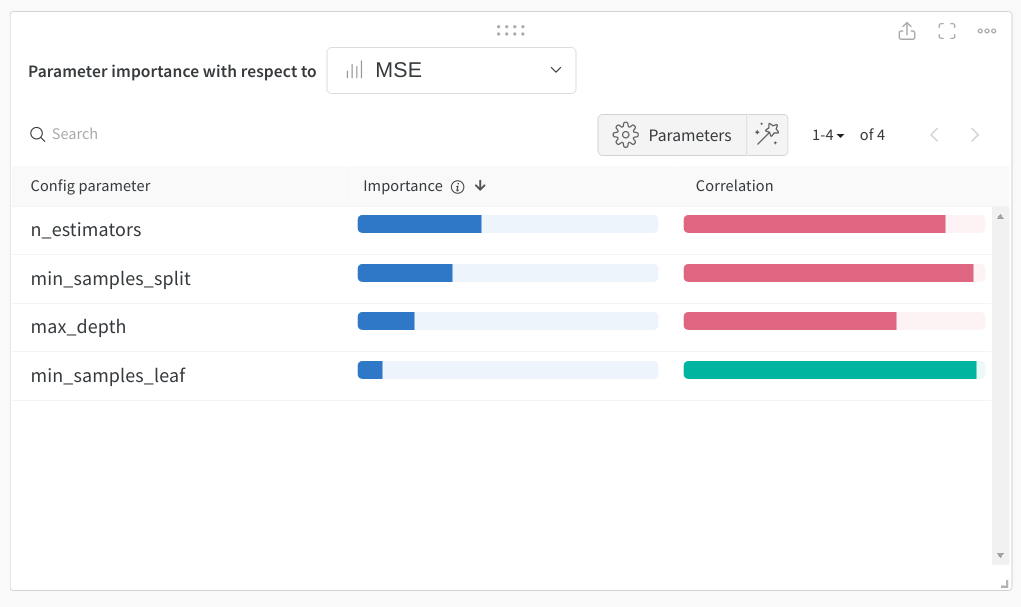

# Q5. Link the best model to the model registry

Now that we have obtained the optimal set of hyperparameters and trained the best model, we can assume that we are ready to test some of these models in production. In this exercise, you'll create a model registry and link the best model from the Sweep to the model registry.

First, you will need to create a Registered Model to hold all the candidate models for your particular modeling task. You can refer to [this section](https://docs.wandb.ai/guides/models/walkthrough#1-create-a-new-registered-model) of the official docs to learn how to create a registered model using the Weights & Biases UI.

Once you have created the Registered Model successfully, you can navigate to the best run of your sweep, navigate to the model artifact created by the particular run, and click on the Link to Registry option from the UI. This would link the model artifact to the Registered Model. You can choose to add some suitable aliases for the Registered Model, such as `production`, `best`, etc.

Now that the model artifact is linked to the Registered Model, which of these information do we see on the Registered Model UI?

* Versioning
* Metadata
* Aliases
* Metric (MSE)
* Source run
* All of these
* None of these

In [7]:
# Initialize a W&B run to start tracking
import wandb
wandb.init()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dpinheirofranco. Use `wandb login --relogin` to force relogin


In [2]:

# Obtain a reference to a Model Version
art = wandb.use_artifact('dpinheirofranco/wandb/6fznmzet-model:v0', type='model')

# Link the Model Version to the Model Collection
art.link("dpinheirofranco/wandb/best-model")

True

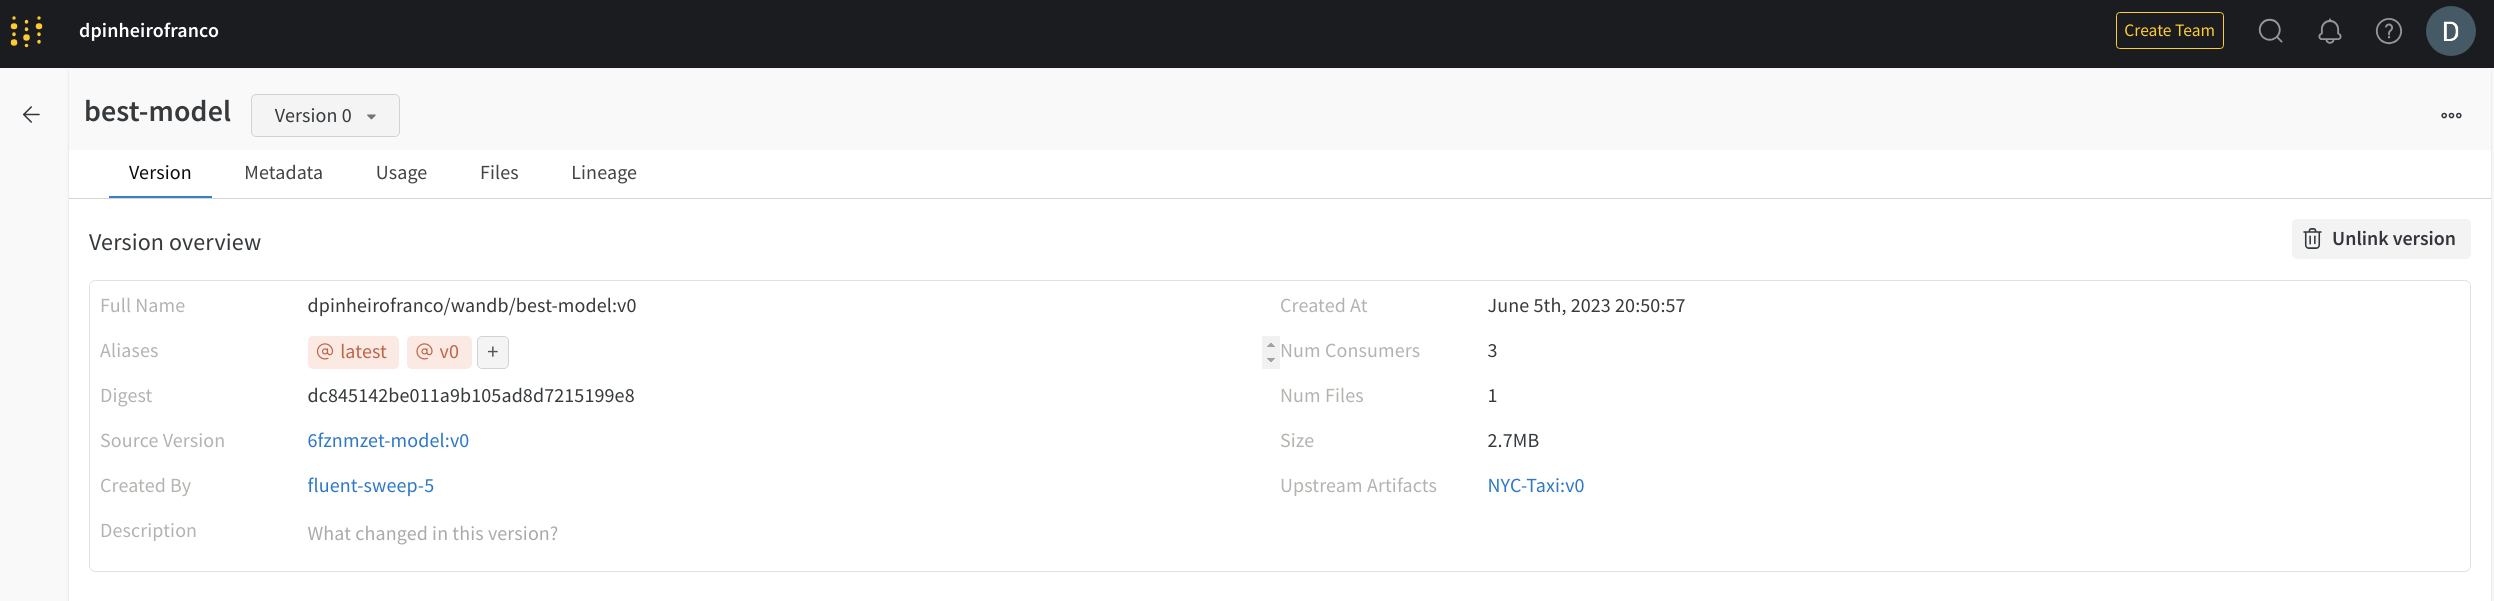

## Submit the results

* Submit your results here: https://forms.gle/ndmTHeogFLeckSHm9
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one

## Answers
* **Q1**: 0.15.3
* **Q2**: 154 kB
* **Q3**: 10
* **Q4**: n_estimators
* **Q5**: All of these

154l
10
min_sample_split
all


## Deadline

The deadline for submitting is 6 June, 23:00 (Berlin time). 

After that, the form will be closed.